In [2]:
%cd /home/steffen/projects/iotclusterpilot/

/home/steffen/projects/iotclusterpilot


Locality
Gandhi Maidan      236
Kidwaipuri         232
Fraser Road        232
Pataliputra        229
Rajendra Nagar     224
Phulwari Sharif    223
Boring Road        222
Kumhrar            218
Gardanibagh        215
Anisabad           209
Name: count, dtype: int64
number of rows: 2240


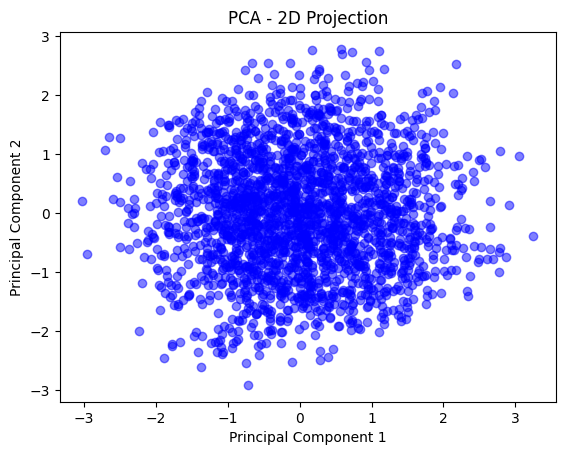

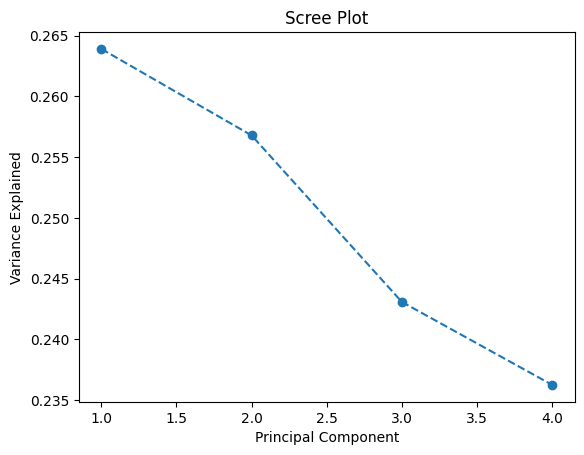

Explained Variance Ratio: [0.26391032 0.25678497 0.24306722 0.23623749]
Cumulative Explained Variance: [0.26391032 0.52069529 0.76376251 1.        ]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from kmeans import load_signal_data
from testing_algorithms import normalize

import tikzplotly
import plotly.express as px


X, origdata = load_signal_data()
#print(X)

radius=10
n_clusters=6

all_features_ordered = [
            "Longitude", 
            "Latitude", 
            "Signal Strength (dBm)", 
            "Data Throughput (Mbps)", 
            "Network Type"
            ]
features_to_normalize = ["Longitude", "Latitude", "Signal Strength (dBm)", "Data Throughput (Mbps)"]
feature_to_scale = ['Longitude','Latitude','Network Type', 'Signal Strength (dBm)', 'Data Throughput (Mbps)']
feature_scales=[1,1,1,1,1]


max_longitude = X[:, 0].max()
min_longitude = X[:, 0].min()
max_latitude = X[:, 1].max()
min_latitude = X[:, 1].min()

feature_to_normalize_idx = [all_features_ordered.index(feature) for feature in features_to_normalize]

X[:, feature_to_normalize_idx] = normalize(X[:, feature_to_normalize_idx])

feature_to_scale_idx = [all_features_ordered.index(feature) for feature in feature_to_scale]

X[:, feature_to_scale_idx] *= feature_scales


# remove network type
X = np.delete(X, 4, 1)


# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_scaled)

# Step 4: Visualize
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection')
plt.show()

# Step 5: Scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

# plot as plotly plot
fig = px.line(x=range(1, len(pca.explained_variance_ratio_) + 1), y=pca.explained_variance_ratio_, title="Scree Plot")

# plot as tikz plot
tikzplotly.save("scree_plot.tex", fig)

# Step 6: Cumulative variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from kmeans import load_signal_data
from testing_algorithms import normalize


X, origdata = load_signal_data()
#print(X)

radius=10
n_clusters=6

all_features_ordered = [
            "Longitude", 
            "Latitude", 
            "Signal Strength (dBm)", 
            "Data Throughput (Mbps)", 
            "Network Type"
            ]
features_to_normalize = ["Longitude", "Latitude", "Signal Strength (dBm)", "Data Throughput (Mbps)"]
feature_to_scale = ['Longitude','Latitude','Network Type', 'Signal Strength (dBm)', 'Data Throughput (Mbps)']
feature_scales=[10,10,1,1,1]


max_longitude = X[:, 0].max()
min_longitude = X[:, 0].min()
max_latitude = X[:, 1].max()
min_latitude = X[:, 1].min()

feature_to_normalize_idx = [all_features_ordered.index(feature) for feature in features_to_normalize]

X[:, feature_to_normalize_idx] = normalize(X[:, feature_to_normalize_idx])

feature_to_scale_idx = [all_features_ordered.index(feature) for feature in feature_to_scale]

X[:, feature_to_scale_idx] *= feature_scales
# remove all X's that is not network type 4
#X = X[X[:, 4] == 3]

from sklearn.feature_selection import VarianceThreshold

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.05)  # Remove features with variance < 0.01
X_reduced = selector.fit_transform(X)

print("Reduced Dataset Shape:", X_reduced.shape)
print(X)
print(X_reduced)

#pickle X_reduced
import pickle
with open('data/X_reduced.pkl', 'wb') as f:
    pickle.dump(X_reduced, f)



'''
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)
plt.title('t-SNE Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

import umap.umap_ as umap
import matplotlib.pyplot as plt

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Visualize
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7)
plt.title('UMAP Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()'''

Reduced Dataset Shape: (897, 4)
[[3.10780260e+00 4.77874095e-01 3.32942437e-01 4.19478987e-02
  1.00000000e+00]
 [8.62482933e+00 3.93738207e+00 6.06459248e-01 8.52005103e-02
  1.00000000e+00]
 [1.91780339e+00 8.19841937e+00 7.31126516e-01 7.68750167e-03
  0.00000000e+00]
 ...
 [7.41982863e+00 4.28884981e+00 5.05677586e-01 4.26683516e-02
  1.00000000e+00]
 [5.82390977e+00 5.64693146e+00 7.37846633e-01 1.31853947e-02
  0.00000000e+00]
 [1.69897771e+00 4.37022757e+00 5.18687915e-01 1.70300911e-02
  0.00000000e+00]]
[[3.10780260e+00 4.77874095e-01 4.19478987e-02 1.00000000e+00]
 [8.62482933e+00 3.93738207e+00 8.52005103e-02 1.00000000e+00]
 [1.91780339e+00 8.19841937e+00 7.68750167e-03 0.00000000e+00]
 ...
 [7.41982863e+00 4.28884981e+00 4.26683516e-02 1.00000000e+00]
 [5.82390977e+00 5.64693146e+00 1.31853947e-02 0.00000000e+00]
 [1.69897771e+00 4.37022757e+00 1.70300911e-02 0.00000000e+00]]


"\nfrom sklearn.manifold import TSNE\nimport matplotlib.pyplot as plt\n\n# Apply t-SNE\ntsne = TSNE(n_components=2, perplexity=30, random_state=42)\nX_tsne = tsne.fit_transform(X)\n\n# Visualize\nplt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)\nplt.title('t-SNE Projection')\nplt.xlabel('Component 1')\nplt.ylabel('Component 2')\nplt.show()\n\nimport umap.umap_ as umap\nimport matplotlib.pyplot as plt\n\n# Apply UMAP\numap_reducer = umap.UMAP(n_components=2, random_state=42)\nX_umap = umap_reducer.fit_transform(X)\n\n# Visualize\nplt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7)\nplt.title('UMAP Projection')\nplt.xlabel('Component 1')\nplt.ylabel('Component 2')\nplt.show()"

In [ ]:
print(X_pca)

[[-4.74240434e-01 -1.75109847e+00  7.06395110e-01 -3.60579594e-01]
 [ 5.96365308e-01  6.99790672e-01  1.30324853e+00 -1.58329236e-01]
 [ 1.57380478e+00  1.92005035e-03 -1.79694794e+00 -5.75646067e-01]
 ...
 [ 2.92170352e-01  4.70672800e-01  8.81050625e-01 -1.46935713e-01]
 [ 1.65328682e+00  3.66896702e-01  1.69640757e-03 -6.13037314e-01]
 [ 7.25678919e-01 -1.09052845e+00 -7.96633089e-01 -8.32930289e-01]]


In [ ]:
# save the PCA data to pickle
import pickle
with open('data/X_pca.pkl', 'wb') as f:
    pickle.dump(X_pca, f)
